# LIGHTGBM

- é uma biblioteca de aprendizado de máquina de código aberto que implementa algoritmos de gradient boosting.
- O LightGBM implementa o algoritmo de gradient boosting, que é uma técnica de aprendizado de máquina que combina múltiplos modelos simples para criar um modelo mais complexo e preciso.
- O LightGBM usa árvores de decisão como modelos base para o gradient boosting.
- O LightGBM oferece uma variedade de parâmetros que podem ser ajustados para otimizar o desempenho do modelo.
- é projetado para lidar com grandes conjuntos de dados e pode ser usado em ambientes de produção.


In [21]:
%pip install lightgbm -q

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_excel('dados.xlsx')

Note: you may need to restart the kernel to use updated packages.


In [22]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [23]:
df.describe()

,KM-LITRO,CILINDROS,PESO(KG),CAVALOS
count,984.000000,986.000000,986.000000,986.000000
mean,8.209553,6.115619,1959.432049,262.622718
std,3.718411,2.764683,459.769620,209.544669
min,3.000000,3.000000,1200.000000,116.000000
25%,4.500000,4.000000,1700.000000,118.000000
50%,8.000000,4.000000,1700.000000,118.000000
75%,11.000000,8.000000,2300.000000,340.000000
max,14.000000,12.000000,3000.000000,1800.000000


In [25]:
df.shape

(986, 7)

In [9]:
data = {
    "MODELO": ["LABORGUINI", "LABORGUINI", "LABORGUINI", "FERRARI", "ASTON MARTIN"],
    "KM-LITRO": [3.0, 3.0, 3.0, 3.0, 3.5],
    "CILINDROS": [12, 12, 12, 12, 10],
    "PESO(KG)": [1200, 1200, 1200, 1400, 1600],
    "CAVALOS": [700, 700, 700, 640, 620],
    "TRANSMISSAO": ["AUTOMATICO", "AUTOMATICO", "AUTOMATICO", "AUTOMATICO", "AUTOMATICO"],
    "PAIS": ["BRASIL", "EUA", "ESPANHA", "CANADA", "INGLATERRA"]
}

df = pd.DataFrame(data)


In [10]:
paises = df["PAIS"].unique()
df["PAIS"] = df["PAIS"].map({pais: i for i, pais in enumerate(paises)})


In [ ]:
transmissoes = df["TRANSMISSAO"].unique()
df["TRANSMISSAO"] = df["TRANSMISSAO"].map({transmissao: i for i, transmissao in enumerate(transmissoes)})

In [12]:
modelos = df["MODELO"].unique()
df["MODELO"] = df["MODELO"].map({modelo: i for i, modelo in enumerate(modelos)})


In [13]:
X = df[["KM-LITRO", "CILINDROS", "PESO(KG)", "CAVALOS", "TRANSMISSAO", "MODELO"]]
y = df["PAIS"]


In [14]:
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)



In [16]:
train_data = lgb.Dataset(X_train, label=y_train)
params = {'objective': 'multiclass', 'num_class': len(paises), 'metric': 'multi_logloss', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.05}



In [17]:
model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

In [18]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)



In [19]:
accuracy = accuracy_score(y_test, y_pred_class)
print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_class))
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_class))



Acurácia: 0.0
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Matriz de confusão:
[[0 0]
 [1 0]]


c:\Users\jesie\Desktop\Curso-IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\jesie\Desktop\Curso-IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\jesie\Desktop\Curso-IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0

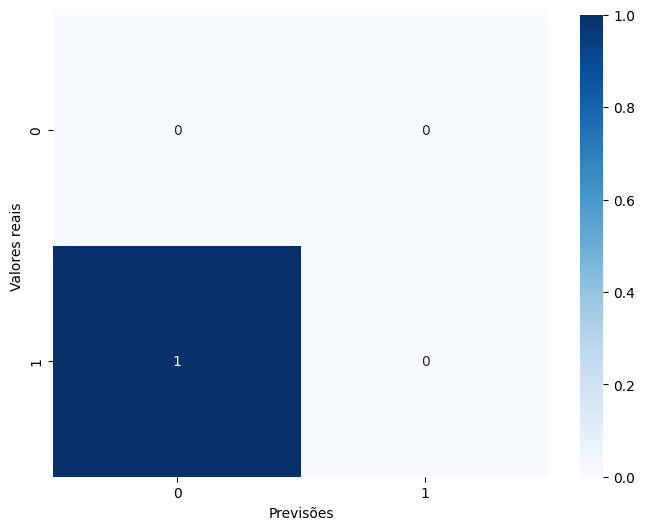

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, cmap='Blues')
plt.xlabel("Previsões")
plt.ylabel("Valores reais")
plt.show()

